In [1]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/4c/43/2fc7f76c8891aef148901f1ba3dee65c1cbac00a85ae5ee0dabc2b861256/mlxtend-0.23.4-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn>=1.3.1 from https://files.pythonhosted.org/packages/a1/a6/c5b78606743a1f28eae8f11973de6613a5ee87366796583fb74c67d54939/scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------  1.4/1.4 MB 41.9 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 17.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.1/11.1 MB 33.9 MB/

In [3]:
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt

In [4]:
titanic = pd.read_csv("Titanic.csv")
titanic

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     2201 non-null   object
 1   Gender    2201 non-null   object
 2   Age       2201 non-null   object
 3   Survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB


<BarContainer object of 4 artists>

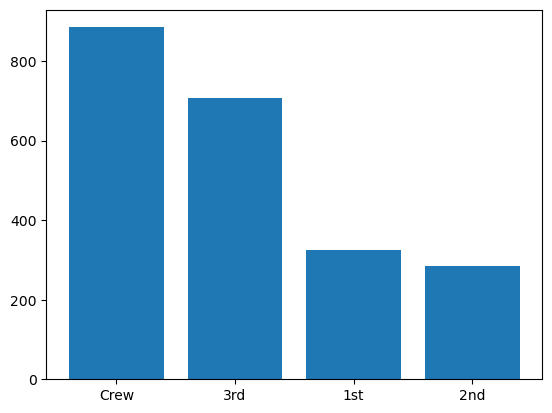

In [7]:
counts = titanic['Class'].value_counts()
plt.bar(counts.index,counts.values)

In [8]:
df = pd.get_dummies(titanic,dtype=int)
df.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Class_1st      2201 non-null   int32
 1   Class_2nd      2201 non-null   int32
 2   Class_3rd      2201 non-null   int32
 3   Class_Crew     2201 non-null   int32
 4   Gender_Female  2201 non-null   int32
 5   Gender_Male    2201 non-null   int32
 6   Age_Adult      2201 non-null   int32
 7   Age_Child      2201 non-null   int32
 8   Survived_No    2201 non-null   int32
 9   Survived_Yes   2201 non-null   int32
dtypes: int32(10)
memory usage: 86.1 KB


In [10]:
frequent_itemsets = apriori(df, min_support = 0.05, use_colnames=True, max_len=None)
frequent_itemsets

C:\Users\dodda\anaconda3\anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Gender_Female)
...,...,...
58,0.053612,"(Class_1st, Age_Adult, Gender_Male, Survived_No)"
59,0.069968,"(Gender_Male, Survived_No, Age_Adult, Class_2nd)"
60,0.175829,"(Survived_No, Age_Adult, Gender_Male, Class_3rd)"
61,0.304407,"(Survived_No, Age_Adult, Gender_Male, Class_Crew)"


In [11]:
rules = association_rules(frequent_itemsets,metric ='lift',min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Class_1st),(Gender_Female),0.147660,0.213539,0.065879,0.446154,2.089329,1.0,0.034348,1.419998,0.611701,0.223077,0.295774,0.377332
1,(Gender_Female),(Class_1st),0.213539,0.147660,0.065879,0.308511,2.089329,1.0,0.034348,1.232615,0.662941,0.223077,0.188716,0.377332
2,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,1.0,0.004587,2.682493,0.037128,0.152050,0.627212,0.567012
3,(Age_Adult),(Class_1st),0.950477,0.147660,0.144934,0.152486,1.032680,1.0,0.004587,1.005694,0.639010,0.152050,0.005661,0.567012
4,(Class_1st),(Survived_Yes),0.147660,0.323035,0.092231,0.624615,1.933584,1.0,0.044531,1.803390,0.566471,0.243697,0.445489,0.455064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,"(Age_Adult, Gender_Male)","(Survived_Yes, Class_Crew)",0.757383,0.096320,0.087233,0.115177,1.195776,1.0,0.014282,1.021312,0.674821,0.113811,0.020867,0.510419
160,"(Age_Adult, Class_Crew)","(Survived_Yes, Gender_Male)",0.402090,0.166742,0.087233,0.216949,1.301104,1.0,0.020188,1.064117,0.387051,0.181132,0.060254,0.370055
161,(Age_Adult),"(Survived_Yes, Gender_Male, Class_Crew)",0.950477,0.087233,0.087233,0.091778,1.052103,1.0,0.004320,1.005004,1.000000,0.091778,0.004980,0.545889
162,(Gender_Male),"(Survived_Yes, Age_Adult, Class_Crew)",0.786461,0.096320,0.087233,0.110919,1.151565,1.0,0.011481,1.016420,0.616356,0.109652,0.016155,0.508289


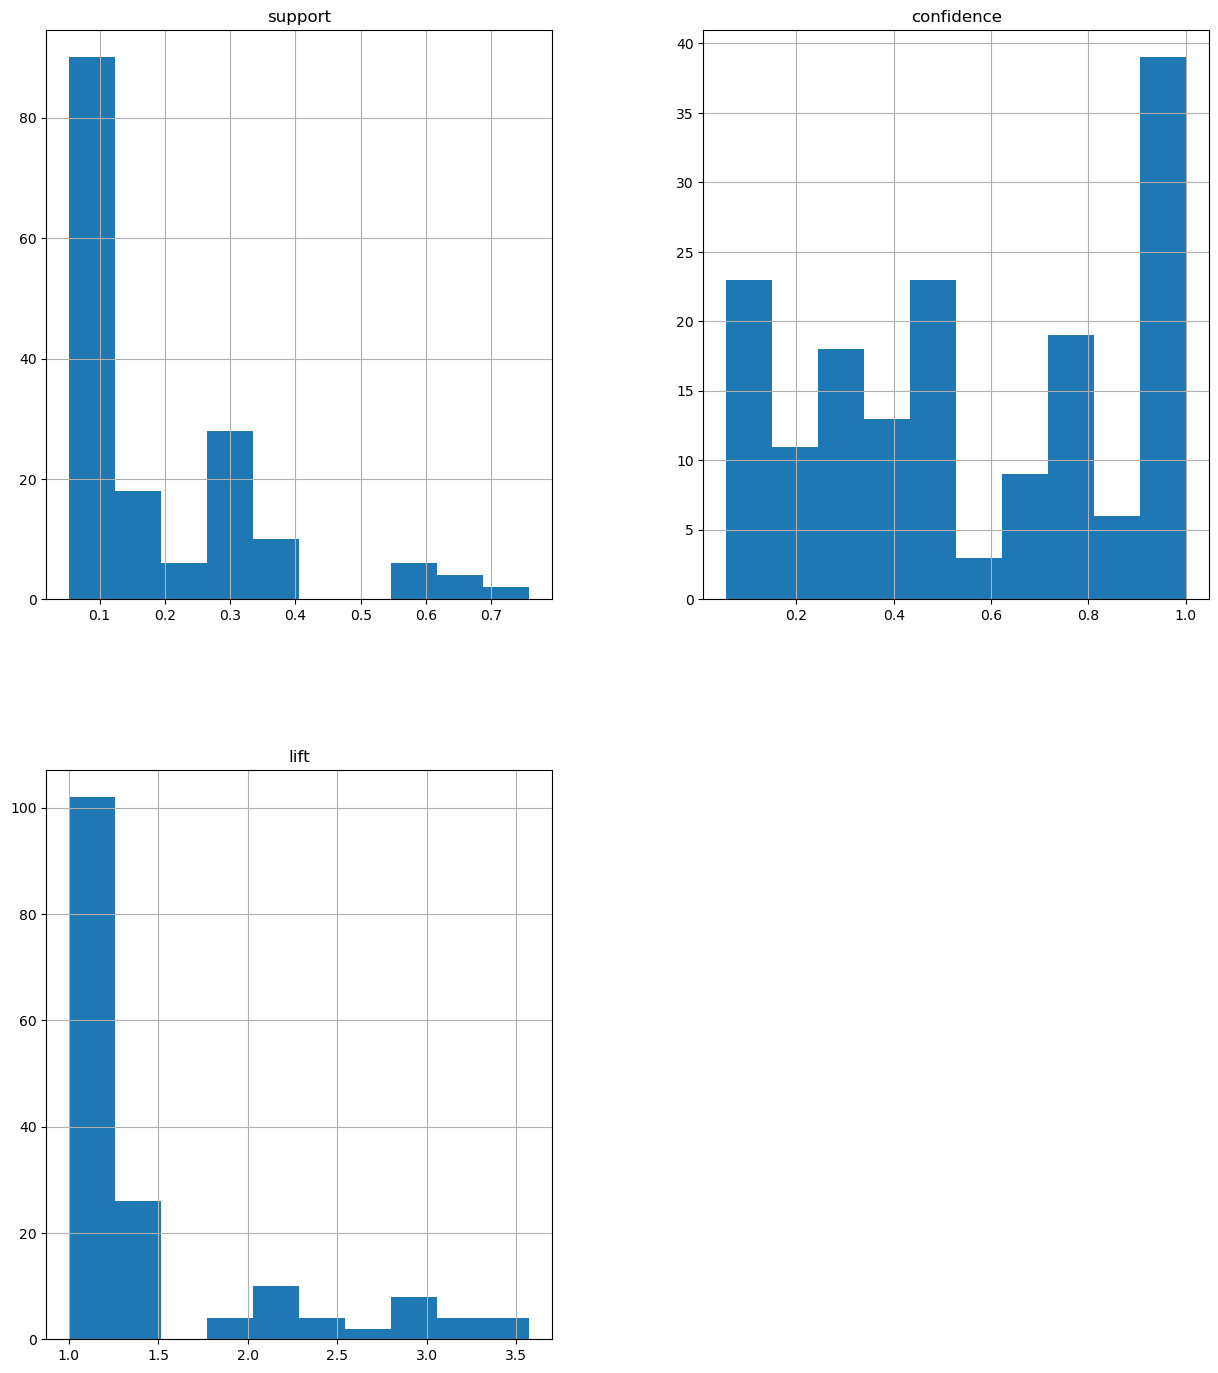

In [13]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,17))
plt.show()